# Meta Plots

In [1]:
# Use this to create the 'cells' list you need to iterate over
analysis = pd.read_csv("analysis.csv")
analysis = analysis.set_index(["lon", "lat"])
cells = np.unique(analysis.index)
cells

array([(-122.75, 42.25), (-119.75, 34.25), (-118.25, 34.75),
       (-109.75, 31.25), (-106.75, 32.25), (-106.25, 28.75),
       (-103.25, 25.75), (-102.75, 20.75), (-99.75, 16.75),
       (-99.75, 17.75), (-98.75, 20.25), (-98.25, 34.75), (-97.75, 25.75),
       (-97.25, 19.75), (-96.25, 42.25), (-91.25, 14.25), (-90.75, 42.75),
       (-88.25, 15.25), (-87.75, 42.25), (-85.75, 42.75), (-84.75, 42.75),
       (-84.25, 33.75), (-79.75, -1.25), (-79.25, 44.25), (-77.75, 21.25),
       (-76.25, 4.25), (-75.25, 7.75), (-73.75, 18.25), (-73.25, -40.75),
       (-73.25, 41.25), (-72.75, 10.25), (-72.75, 46.25),
       (-71.75, -35.75), (-71.25, 10.25), (-69.25, 9.75),
       (-65.75, -27.25), (-64.75, -21.75), (-62.25, 8.25),
       (-60.75, -32.75), (-58.75, -38.75), (-56.25, -25.75),
       (-54.25, -31.25), (-53.25, -26.25), (-51.25, -22.25),
       (-50.25, -29.75), (-50.25, -27.75), (-48.75, -2.75),
       (-47.75, -23.25), (-47.75, -18.25), (-47.25, -2.75),
       (-46.75, -23.75), (-

In [2]:
# Use this from now on as you want 'year' in the index for easier plotting
analysis = pd.read_csv("analysis.csv")
analysis = analysis.set_index(["lon", "lat", "year"])
analysis

tasmax_num_days  tasmax_pct_days  tasmax_max_temp  \
lon     lat    year                                                            
-122.75  42.25 01/01/2006               34         0.093087       314.748779   
               01/01/2007               18         0.049281       311.763672   
               01/01/2008               43         0.117728       315.062805   
               01/01/2009                9         0.024641       312.657166   
               01/01/2010               19         0.052019       314.164001   
...                                    ...              ...              ...   
 144.75 -6.25  01/01/2095               29         0.079398       320.109863   
               01/01/2096                4         0.010951       316.082214   
               01/01/2097               42         0.114990       320.103607   
               01/01/2098                0         0.000000              NaN   
               01/01/2099                0         0.000000              NaN   

                           tasmin_num_days  tasmin_pct_days  tasmin_max_temp  
lon     lat    year                                                           
-122.75  42.25 01/01/2006               12         0.032854       292.928497  
               01/01/2007               18         0.049281       291.598755  
               01/01/2008               13         0.035592       292.765961  
               01/01/2009                3         0.008214       288.956512  
               01/01/2010               24         0.065708       290.444702  
...                                    ...              ...              ...  
 144.75 -6.25  01/01/2095              202         0.553046       298.004456  
               01/01/2096              222         0.607803       298.183350  
               01/01/2097              127         0.347707       297.702087  
               01/01/2098              256         0.700890       297.619263  
               01/01/2099              204         0.558522       297.589783  

[34122 rows x 6 columns]

In [3]:
# Filling missing values
analysis["tasmax_max_temp_filled"] = analysis.tasmax_max_temp.fillna(method="ffill")
analysis["tasmax_num_days"] = analysis["tasmax_num_days"].replace(0, np.nan)
analysis["tasmax_num_days_filled"] = analysis.tasmax_num_days.fillna(method="ffill")
# analysis.loc[113.75, -1.25].tail(30)

In [4]:
def get_list_sorted_by_final_val(column):
    """
    Given a column in analysis.csv, go through each cell and get the final value
    in a rolling exponential mean plot.

    Return a list of cells and final values in ascending order.

    This is used to calculate the quantiles on the 'meta plots'.

    Note: you must have all cells stored in a list 'cells' and 'analysis.csv'
    loaded in as 'analysis' with 'lon' and 'lat' as the index
    """
    all_final_vals = []
    for c in cells:
        data = analysis.loc[c]
        rolling = data.rolling(window=5, win_type="exponential")
        rolling_mean = rolling.mean(tau=20)

        final_val = rolling_mean[column].iloc[-1]
        all_final_vals.append(final_val)

    cell_and_final_vals = list(zip(cells, all_final_vals))
    c_and_f_ascending = sorted(cell_and_final_vals, key=lambda x: x[-1])
    return c_and_f_ascending

In [5]:
def plot_meta_plot(column):

    fig, ax = plt.subplots(figsize=(8, 5.5))

    c_and_f_ascending = get_list_sorted_by_final_val(column)

    labels = [
        "2010",
        "2020",
        "2030",
        "2040",
        "2050",
        "2060",
        "2070",
        "2080",
        "2090",
        "2099",
    ]
    xticks = [4, 14, 24, 34, 44, 54, 64, 74, 84, 93]

    # Defining quantiles
    tenth = round(len(c_and_f_ascending) * 0.1)
    quarter = round(len(c_and_f_ascending) * 0.25)
    median = round(len(c_and_f_ascending) * 0.5)
    three_quarter = round(len(c_and_f_ascending) * 0.75)
    ninety = round(len(c_and_f_ascending) * 0.9)

    quantiles = [tenth, quarter, median, three_quarter, ninety]

    for i, c in enumerate(c_and_f_ascending):
        data = analysis.loc[c[0]]
        rolling = data.rolling(window=5, win_type="exponential")
        rolling_mean = rolling.mean(tau=20)

        if i == median:
            ax.plot(rolling_mean[column], "r", lw=5, zorder=20, label="Median")
        elif i == quantiles[0]:
            ax.plot(
                rolling_mean[column],
                "r",
                lw=2,
                zorder=10,
                label="10th, 25th, 75th, 90th",
            )
        elif i in quantiles:
            ax.plot(rolling_mean[column], "r", lw=2, zorder=10)
        else:
            ax.plot(rolling_mean[column], "pink", lw=0.7, zorder=0)

    ax.set(xlabel="Date")
    ax.legend(prop=dict(size=11))
    plt.xticks([])
    plt.xticks(xticks, labels, rotation=90, size=10)
    return ax

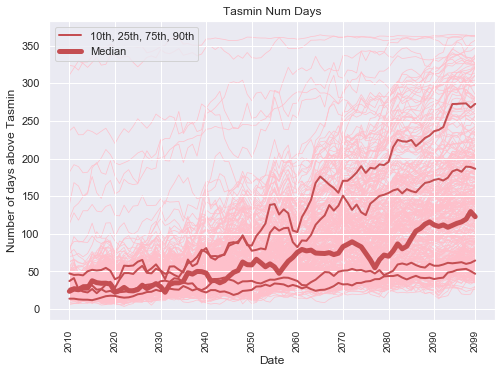

In [6]:
ax = plot_meta_plot("tasmin_num_days")
# Set title and ylabel
ax.set(ylabel="Number of days above Tasmin", title="Tasmin Num Days")
plt.show()

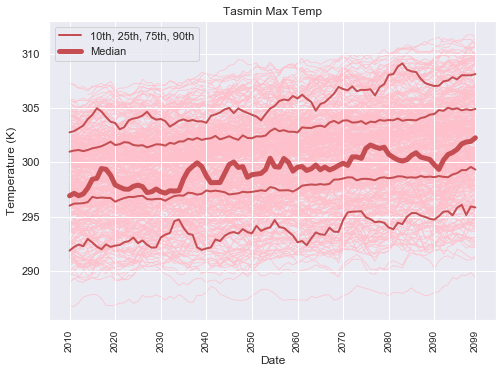

In [7]:
ax = plot_meta_plot("tasmin_max_temp")
# Set title and ylabel
ax.set(ylabel="Temperature (K)", title="Tasmin Max Temp")
plt.show()

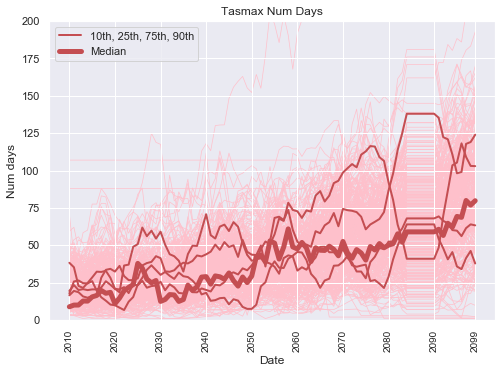

In [8]:
ax = plot_meta_plot("tasmax_num_days_filled")

# Set y-axis limits with ylim keyword argument and a list of values
ax.set(title="Tasmax Num Days", ylabel="Num days", ylim=[0, 200])
plt.show()

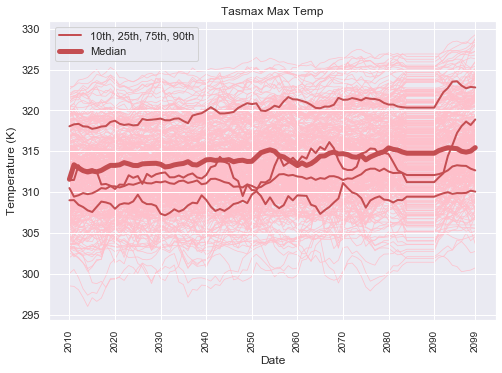

In [9]:
ax = plot_meta_plot("tasmax_max_temp_filled")
ax.set(title="Tasmax Max Temp", ylabel="Temperature (K)")

# Uncomment to save the figure
# plt.savefig('tasmax_max_temp_filled.png')
plt.show()